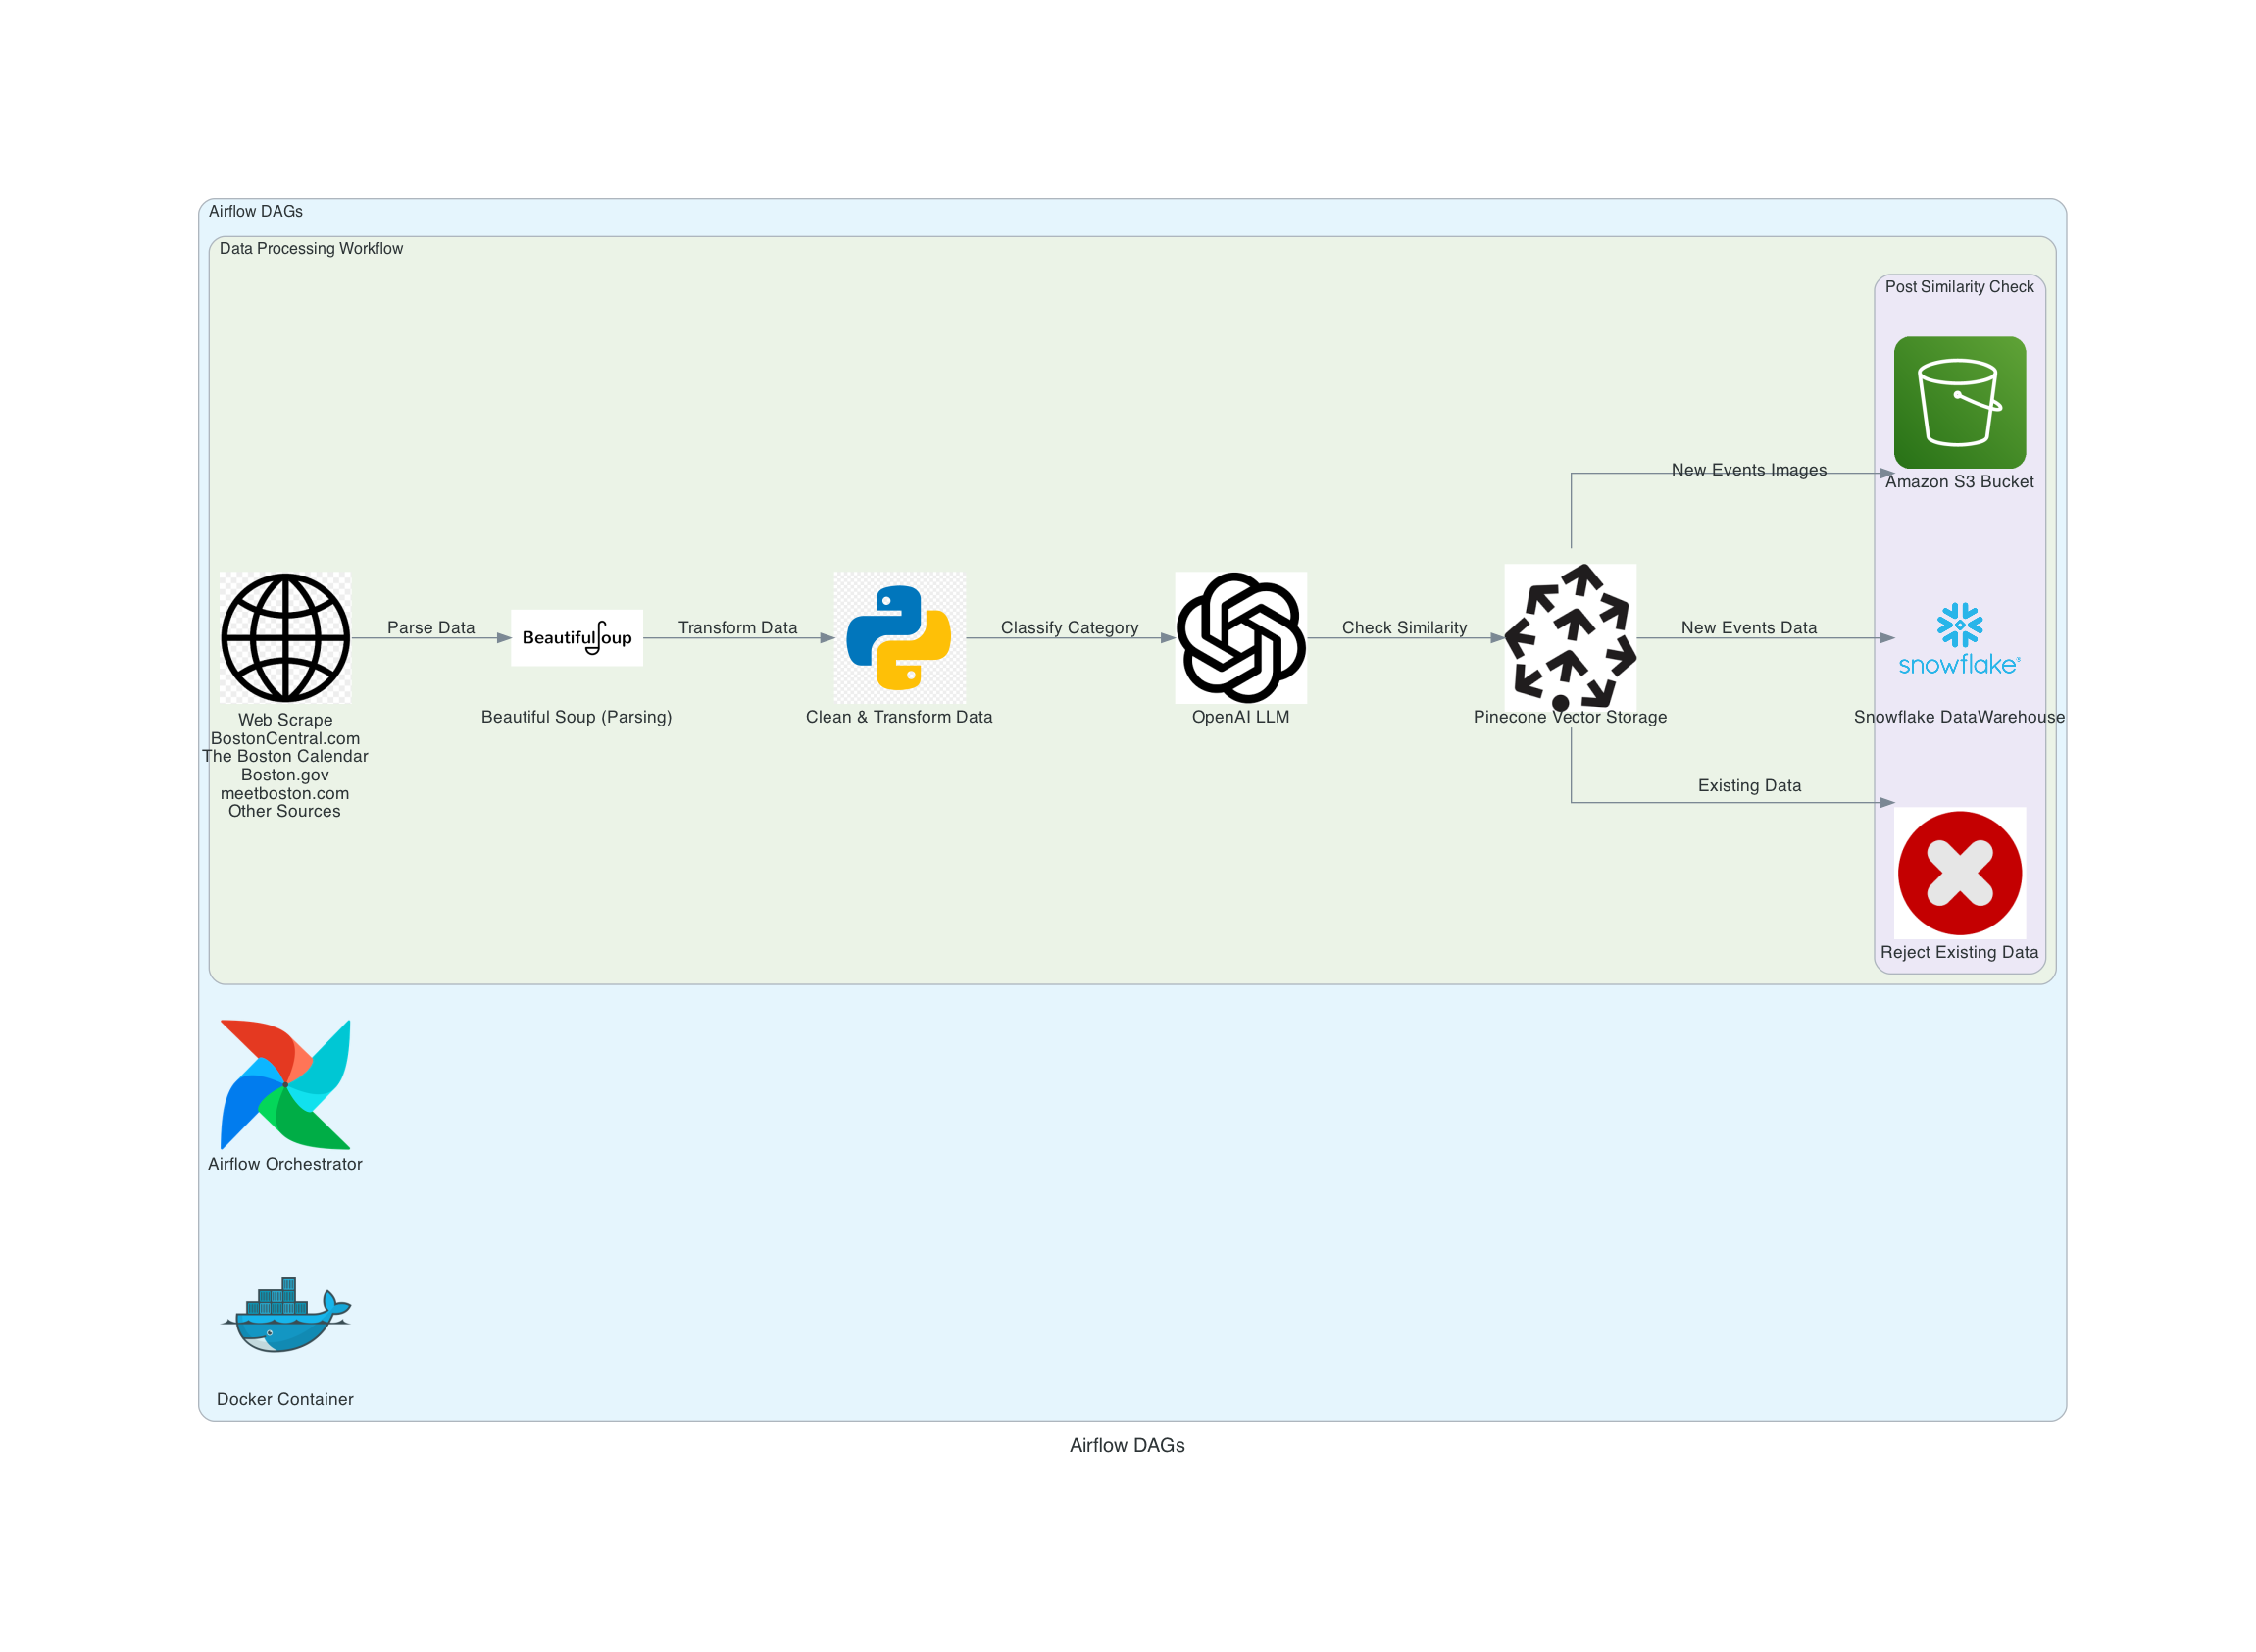

In [1]:
from diagrams import Diagram, Cluster, Edge
from diagrams.onprem.workflow import Airflow
from diagrams.onprem.container import Docker
from diagrams.custom import Custom
from diagrams.aws.storage import S3

web_scrape_icon = "input_icons/web.png"
beautiful_soup_icon = "input_icons/bs.png"
python_icon = "input_icons/python.png" 
openai_icon = "input_icons/OpenAI.png"
pinecone_icon = "input_icons/pinecone.png"
snowflake_icon = "input_icons/snowflake.png"
reject_icon = "input_icons/reject.png" 

with Diagram("Airflow DAGs", show=False, direction="LR") as diag:
    
    with Cluster("Airflow DAGs"):
        airflow = Airflow("Airflow Orchestrator")
        docker = Docker("Docker Container")

        
        with Cluster("Data Processing Workflow"):
            
            web_scrape = Custom(
                "Web Scrape\nBostonCentral.com\nThe Boston Calendar\nBoston.gov\nmeetboston.com\nOther Sources",
                web_scrape_icon,
            )

            
            parser = Custom("Beautiful Soup (Parsing)", beautiful_soup_icon)
            transformation = Custom("Clean & Transform Data", python_icon)
            classifier = Custom("OpenAI LLM", openai_icon)
            similarity_check = Custom("Pinecone Vector Storage", pinecone_icon)

            with Cluster("Post Similarity Check"):
                reject = Custom("Reject Existing Data", reject_icon)
                snowflake = Custom("Snowflake DataWarehouse", snowflake_icon)
                s3_storage = S3("Amazon S3 Bucket")

        web_scrape >> Edge(label="Parse Data") >> parser
        parser >> Edge(label="Transform Data") >> transformation
        transformation >> Edge(label="Classify Category") >> classifier
        classifier >> Edge(label="Check Similarity") >> similarity_check
        similarity_check >> Edge(label="Existing Data") >> reject
        similarity_check >> Edge(label="New Events Data") >> snowflake
        similarity_check >> Edge(label="New Events Images") >> s3_storage

diag

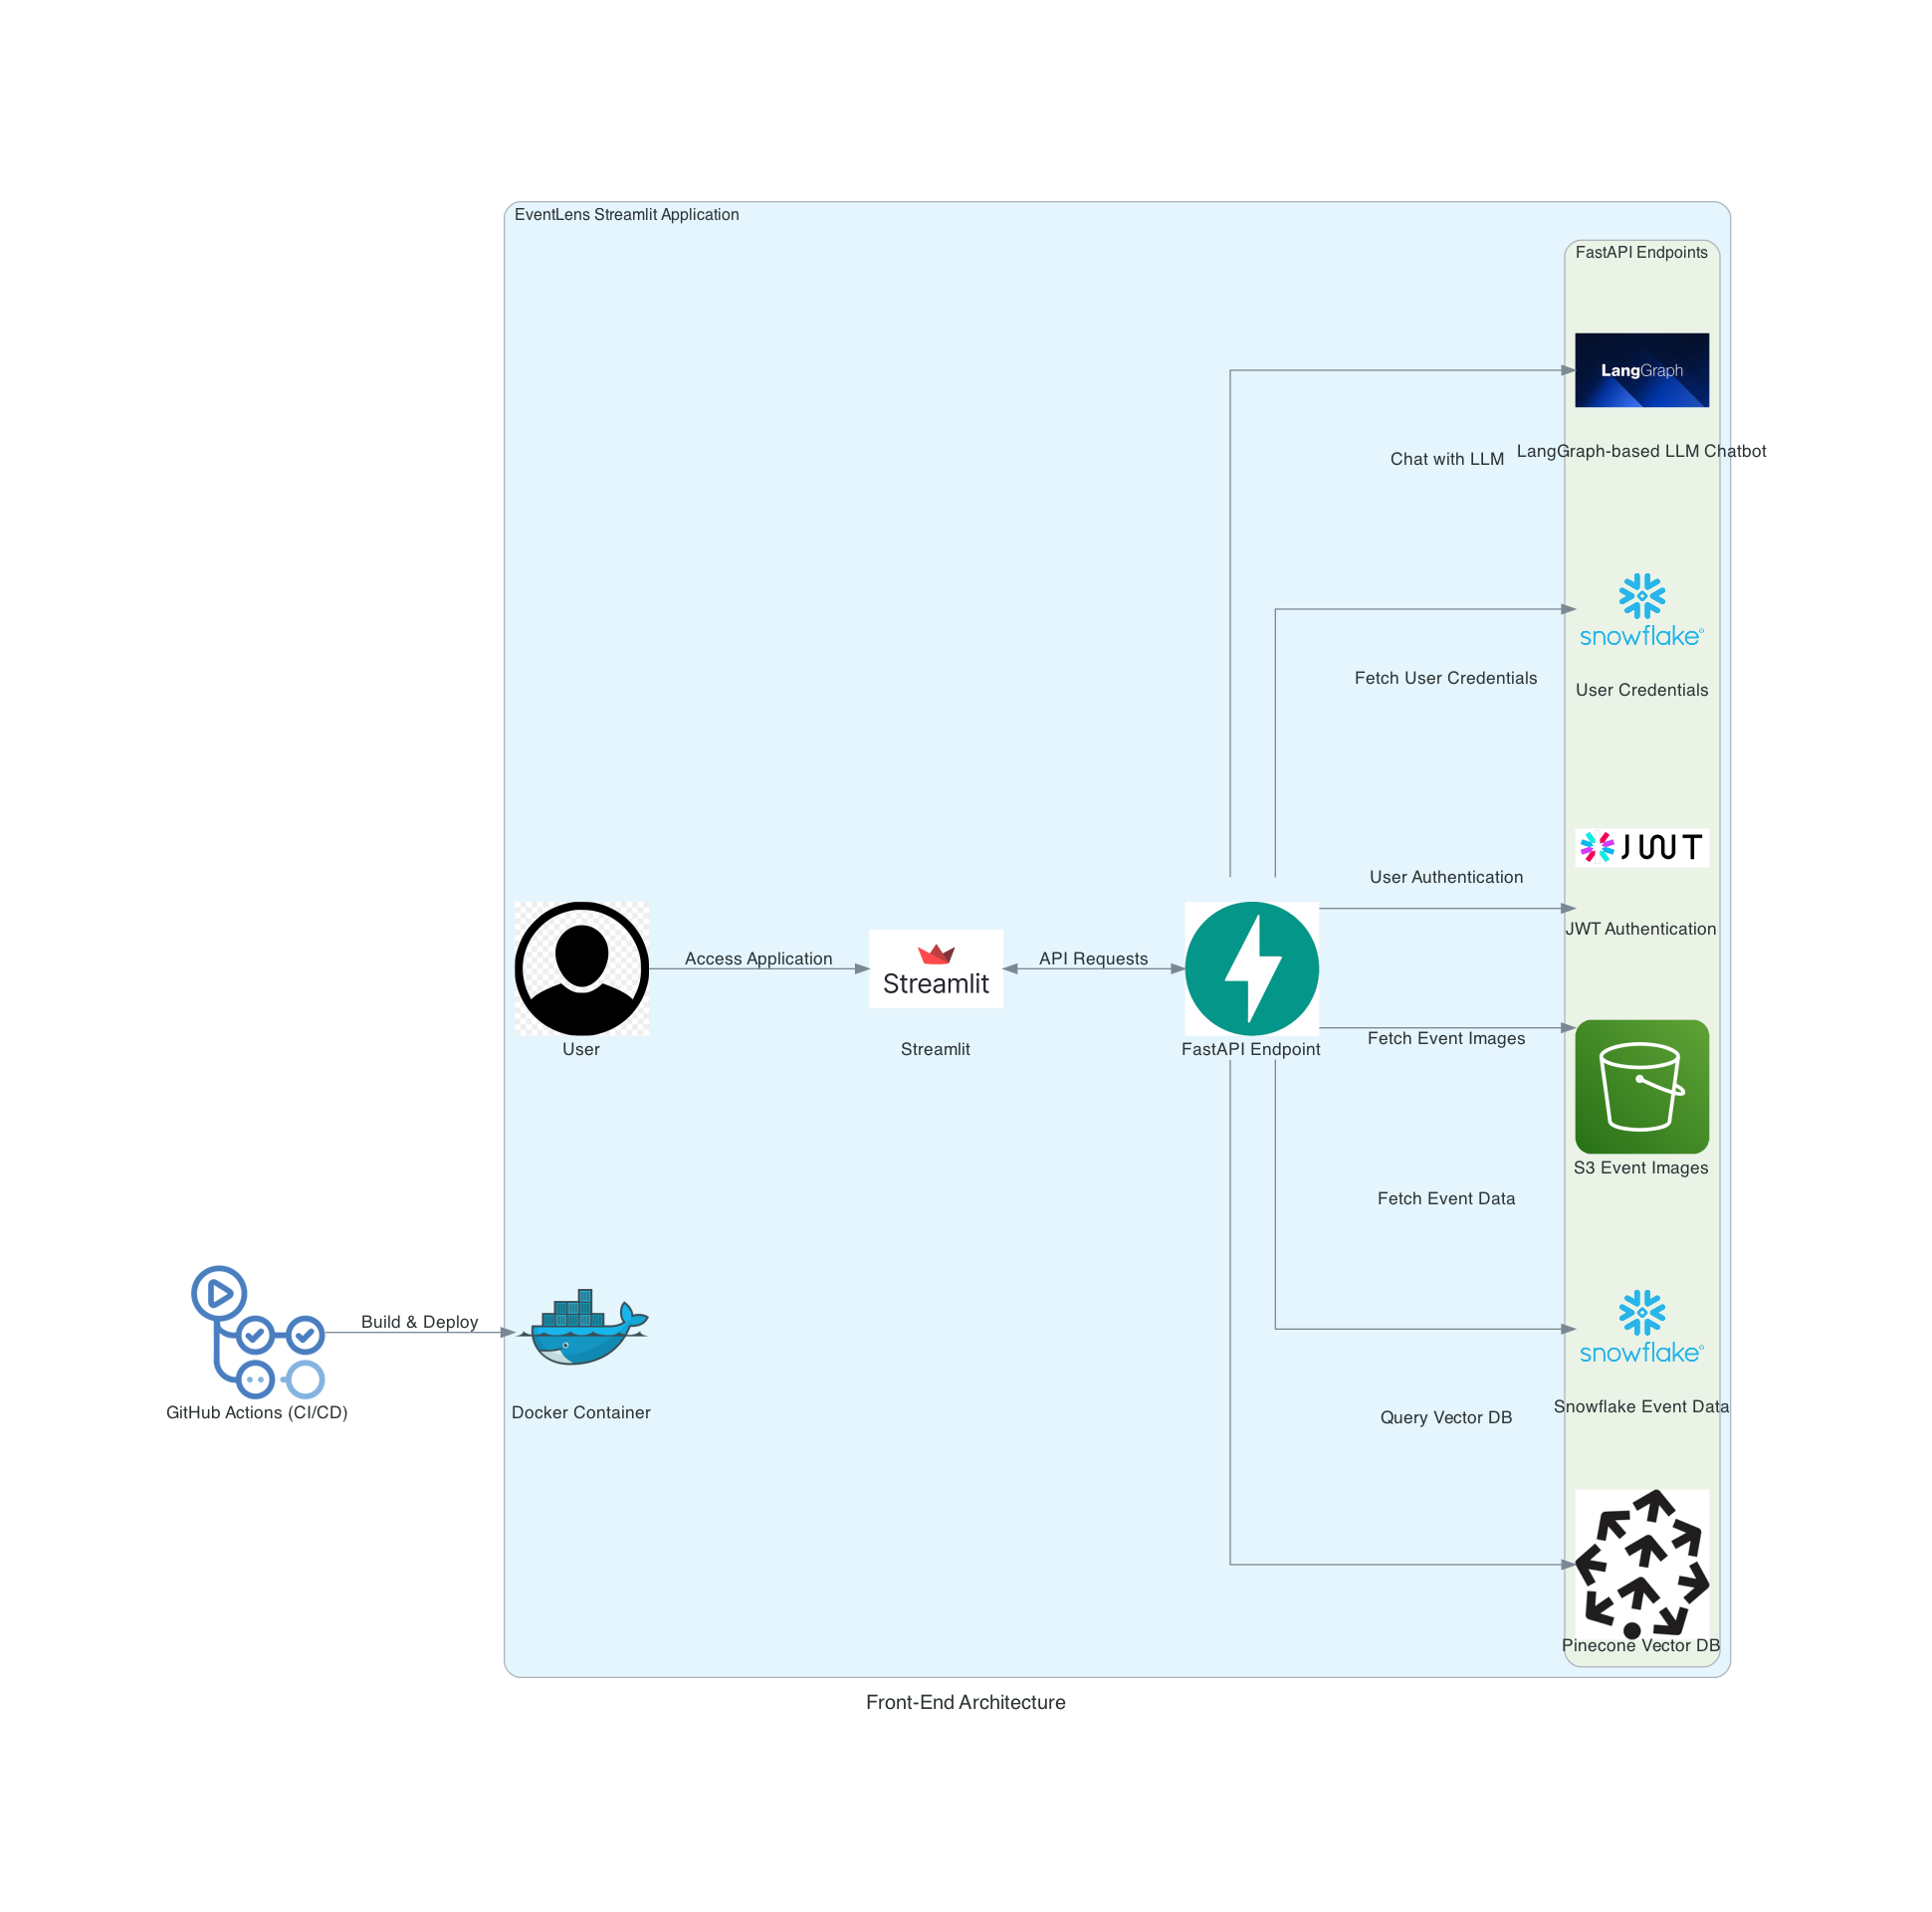

In [3]:
from diagrams import Diagram, Cluster, Edge
from diagrams.custom import Custom
from diagrams.aws.storage import S3
from diagrams.onprem.container import Docker

streamlit_icon = "input_icons/streamlit.png"
fastapi_icon = "input_icons/fastapi.png"
pinecone_icon = "input_icons/pinecone.png"
snowflake_icon = "input_icons/snowflake.png"
jwt_icon = "input_icons/jwt.png"
langgraph_icon = "input_icons/langgraph.png"
user_icon = "input_icons/user.png"
github_actions_icon = "input_icons/github_actions.png"

with Diagram("Front-End Architecture", show=False, direction="LR") as diag1:

    github_actions = Custom("GitHub Actions (CI/CD)", github_actions_icon)

   
    with Cluster("EventLens Streamlit Application"):
        docker = Docker("Docker Container")
        user = Custom("User", user_icon)
        streamlit = Custom("Streamlit", streamlit_icon)
        fastapi = Custom("FastAPI Endpoint", fastapi_icon)

        with Cluster("FastAPI Endpoints"):
            pinecone = Custom("Pinecone Vector DB", pinecone_icon)
            snowflake_event_data = Custom("Snowflake Event Data", snowflake_icon)
            s3_event_images = S3("S3 Event Images")
            jwt_auth = Custom("JWT Authentication", jwt_icon)
            snowflake_user_credentials = Custom("User Credentials", snowflake_icon)
            langgraph_chatbot = Custom("LangGraph-based LLM Chatbot", langgraph_icon)

        user >> Edge(label="Access Application") >> streamlit
        streamlit << Edge(label="API Requests", reverse=True) >> fastapi
        fastapi >> Edge(label="Query Vector DB") >> pinecone
        fastapi >> Edge(label="Fetch Event Data") >> snowflake_event_data
        fastapi >> Edge(label="Fetch Event Images") >> s3_event_images
        fastapi >> Edge(label="User Authentication") >> jwt_auth
        fastapi >> Edge(label="Fetch User Credentials") >> snowflake_user_credentials
        fastapi >> Edge(label="Chat with LLM") >> langgraph_chatbot
        
    github_actions >> Edge(label="Build & Deploy") >> docker


diag1